In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pCTRval = pd.read_csv('E:\\web_economics\\pCTRval.csv')
df_val = pd.read_csv('E:\\web_economics\\validation.csv')

## Linear bidding

In [3]:
# Average CTR
avgCTR = df_val.click.sum() / df_val.bidid.count()
avgCTR

0.00075396415000550463

In [4]:
def linear_bid_generator():
    #bid = base_bid * pCTR / avgCTR
    bid_max = 300

    bids = []
    l_pctrval = list(pCTRval['0'])
    for base_bid in range(10, bid_max+10, 10):
        for p in l_pctrval:
            bid = base_bid * p / avgCTR
            bids.append(bid)

    bid_groups = [bids[x:x+len(pCTRval)] for x in range(0, len(bids), len(pCTRval))]
    return bid_groups

In [5]:
print(len(pCTRval), len(df_val))

299749 299749


In [6]:
data = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
bid_groups = linear_bid_generator()

maxi = 0
maxv = -1
for k in range(0,len(bid_groups)):
    budget = 6250000.0
    imps = 0
    clicks = 0
    spent = 0
    bid = bid_groups[k]
    check = bid >= df_val.payprice
    for i in range(0,len(check)):
        payprice = df_val.payprice[i]
        if budget < payprice:
            break
        if check[i]:
            imps = imps + 1
            clicks = clicks + df_val.click[i]
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if ctr * clicks > maxv:
        maxv = ctr * clicks
        maxi = k
    lists['bid'] = range(10, 310, 10)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)
data.bid = lists['bid']
data.clicks = lists['clicks']
data.imps = lists['imps']
data.spent = lists['spent']
data.CTR = lists['ctr']
data.CPC = lists['cpc']
data.CPM = lists['cpm']
data

,bid,clicks,imps,spent,CTR,CPC,CPM
0,10,75,12800,450.405,0.585938,6.005400,35.187891
1,20,95,25099,955.084,0.378501,10.053516,38.052671
2,30,116,37332,1503.680,0.310725,12.962759,40.278581
3,40,128,49002,2060.418,0.261214,16.097016,42.047631
4,50,134,59790,2618.158,0.224118,19.538493,43.789229
5,60,148,70151,3166.594,0.210973,21.395905,45.139684
6,70,156,79674,3699.750,0.195798,23.716346,46.436102
7,80,161,88774,4231.295,0.181359,26.281335,47.663674
8,90,166,97406,4767.789,0.170421,28.721620,48.947590
9,100,168,105576,5288.503,0.159127,31.479185,50.091905


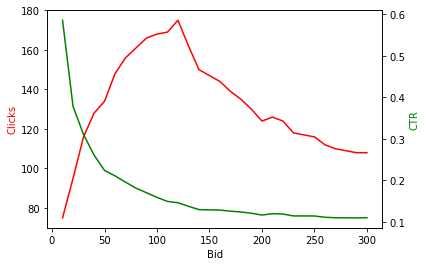

In [11]:
first_line = data[['clicks','bid']].astype(float)
second_line = data[['bid','CTR']].astype(float)

fig, ax1 = plt.subplots()
ax1.plot(first_line.bid,first_line.clicks, color='r')
ax1.set_xlabel('Bid')
ax1.set_ylabel('Clicks', color='r')

ax2 = ax1.twinx()
ax2.plot(second_line.bid, second_line.CTR, color='g')
ax2.set_ylabel('CTR', color='g')
fig.savefig('linear.png', dpi=100)
plt.show()

In [10]:
data.iloc[np.where(data.clicks == data.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
11,120,175,119670,6249.95,0.146235,35.714,52.22654
